In [3]:
%matplotlib inline
import numpy
import scipy
import sklearn
from pathlib import Path
import IPython.display as ipd
import matplotlib.pyplot as plt 
import librosa, librosa.display

# Basic Feature Extraction

Somehow, we must extract the characteristics of our audio signal that are most relevant to the problem we are trying to solve. For example, if we want to classify instruments by timbre, we will want features that distinguish sounds by their timbre and not their pitch. If we want to perform pitch detection, we want features that distinguish pitch and not timbre.

This process is known as feature extraction.

Let's begin with twenty audio files: ten kick drum samples, and ten snare drum samples. Each audio file contains one drum hit.

Read and Store Train Data:

In [4]:
Moisture_14_percent = [
    librosa.load(p)[0] for p in Path().glob('wav/train/6 by 1_14_*.wav')
]
Moisture_16_percent = [
    librosa.load(p)[0] for p in Path().glob('wav/train/6 by 1_16_*.wav')
]
Moisture_17_percent = [
    librosa.load(p)[0] for p in Path().glob('wav/train/6 by 1_17_*.wav')
]

Moisture_19_percent = [
    librosa.load(p)[0] for p in Path().glob('wav/train/6 by 1_19_*.wav')
]

Moisture_20_percent = [
    librosa.load(p)[0] for p in Path().glob('wav/train/6 by 1_20_*.wav')
]

Read and Load Test Data

In [5]:
Moisture_14_percent_test = [
    librosa.load(p)[0] for p in Path().glob('wav/test/6 by 1_14_*.wav')
]
Moisture_16_percent_test = [
    librosa.load(p)[0] for p in Path().glob('wav/test/6 by 1_16_*.wav')
]
Moisture_17_percent_test = [
    librosa.load(p)[0] for p in Path().glob('wav/test/6 by 1_17_*.wav')
]

Moisture_19_percent_test = [
    librosa.load(p)[0] for p in Path().glob('wav/test/6 by 1_19_*.wav')
]

Moisture_20_percent_test = [
    librosa.load(p)[0] for p in Path().glob('wav/test/6 by 1_20_*.wav')
]

In [6]:
len(Moisture_14_percent)

20

In [7]:
len(Moisture_14_percent_test)

5

In [8]:
len(Moisture_16_percent)

20

In [9]:
len(Moisture_16_percent_test)

5

In [10]:
len(Moisture_17_percent)

20

In [11]:
len(Moisture_17_percent_test)

5

In [12]:
len(Moisture_19_percent)

20

In [13]:
len(Moisture_19_percent_test)

5

In [14]:
len(Moisture_20_percent)

20

In [15]:
len(Moisture_20_percent_test)

5

## Constructing a Feature Vector

A *feature vector* is simply a collection of features. Here is a simple function that constructs a two-dimensional feature vector from a signal:

In [16]:
def extract_features(signal):
    return [
        librosa.feature.mfcc(signal)[0, 0],
        librosa.feature.mfcc(signal)[0, 0],
    ]

If we want to aggregate all of the feature vectors among signals in a collection, we can use a list comprehension as follows:

In [17]:
Moisture_14_percent_features = numpy.array([extract_features(x) for x in Moisture_14_percent])
Moisture_16_percent_features = numpy.array([extract_features(x) for x in Moisture_16_percent])
Moisture_17_percent_features = numpy.array([extract_features(x) for x in Moisture_17_percent])
Moisture_19_percent_features = numpy.array([extract_features(x) for x in Moisture_19_percent])
Moisture_20_percent_features = numpy.array([extract_features(x) for x in Moisture_20_percent])

In [18]:
Moisture_14_percent_features_test = numpy.array([extract_features(x) for x in Moisture_14_percent_test])
Moisture_16_percent_features_test = numpy.array([extract_features(x) for x in Moisture_16_percent_test])
Moisture_17_percent_features_test = numpy.array([extract_features(x) for x in Moisture_17_percent_test])
Moisture_19_percent_features_test = numpy.array([extract_features(x) for x in Moisture_19_percent_test])
Moisture_20_percent_features_test = numpy.array([extract_features(x) for x in Moisture_20_percent_test])

## Feature Scaling

The features that we used in the previous example included zero crossing rate and spectral centroid. These two features are expressed using different units. This discrepancy can pose problems when performing classification later. Therefore, we will normalize each feature vector to a common range and store the normalization parameters for later use.  

Many techniques exist for scaling your features. For now, we'll use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).  `MinMaxScaler` returns an array of scaled values such that each feature dimension is in the range -1 to 1.

Let's concatenate all of our feature vectors into one *feature table*:

In [19]:
feature_table = numpy.vstack((Moisture_14_percent_features, Moisture_16_percent_features,
                              Moisture_17_percent_features, Moisture_19_percent_features,
                              Moisture_20_percent_features))
print(feature_table.shape)

(100, 2)


In [20]:
feature_table_test = numpy.vstack((Moisture_14_percent_features_test, Moisture_16_percent_features_test,
                              Moisture_17_percent_features_test, Moisture_19_percent_features_test,
                              Moisture_20_percent_features_test))
print(feature_table_test.shape)

(25, 2)


Scale each feature dimension to be in the range -1 to 1:

In [21]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
training_features = scaler.fit_transform(feature_table)
print(training_features.min(axis=0))
print(training_features.max(axis=0))

[-1. -1.]
[1. 1.]


In [22]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
testing_features = scaler.fit_transform(feature_table_test)
print(testing_features.min(axis=0))
print(testing_features.max(axis=0))

[-1. -1.]
[1. 1.]


In [23]:
Moisture_14_percent_labels = numpy.zeros(20)
Moisture_16_percent_labels = numpy.zeros(20)
Moisture_17_percent_labels = numpy.zeros(20)
Moisture_19_percent_labels = numpy.ones(20)
Moisture_20_percent_labels = numpy.ones(20)

In [24]:
Moisture_14_percent_labels_test = numpy.zeros(5)
Moisture_16_percent_labels_test = numpy.zeros(5)
Moisture_17_percent_labels_test = numpy.zeros(3)
Moisture_19_percent_labels_test = numpy.ones(7)
Moisture_20_percent_labels_test = numpy.ones(5)

In [25]:
training_labels = numpy.concatenate((Moisture_14_percent_labels, Moisture_16_percent_labels,
                                     Moisture_17_percent_labels, Moisture_19_percent_labels,
                                     Moisture_20_percent_labels))

In [26]:
testing_labels = numpy.concatenate((Moisture_14_percent_labels_test, Moisture_16_percent_labels_test,
                                     Moisture_17_percent_labels_test, Moisture_19_percent_labels_test,
                                     Moisture_20_percent_labels_test))

In [38]:
x_train = numpy.concatenate(training_features, training_labels)

TypeError: only integer scalar arrays can be converted to a scalar index

In [27]:
#print (training_features)
#print (training_labels)

In [28]:
#print (testing_features)
#print (testing_labels )

## Bayesian Network

In [31]:
import tensorflow as tf 
from tensorflow_probability import edward2 as ed 

def neural_network(x):
    h = tf.tanh(tf.matmul(x, W_0) + b_0)
    h = tf.tanh(tf.matmul(h, W_1) + b_1)
    h = tf.matmul(h, W_2) + b_2
    return tf.reshape(h, [-1])

N = 40  # number of data ponts
D = 1   # number of features

W_0 = ed.Normal(loc=tf.zeros([D, 10]), scale=tf.ones([D, 10]))
W_1 = ed.Normal(loc=tf.zeros([10, 10]), scale=tf.ones([10, 10]))
W_2 = ed.Normal(loc=tf.zeros([10, 1]), scale=tf.ones([10, 1]))
b_0 = ed.Normal(loc=tf.zeros(10), scale=tf.ones(10))
b_1 = ed.Normal(loc=tf.zeros(10), scale=tf.ones(10))
b_2 = ed.Normal(loc=tf.zeros(1), scale=tf.ones(1))


In [37]:
x = tf.cast(training_features, dtype=tf.float32) # Assuming x_train already exists
# x = tf.random_uniform([N, D], minval=10, maxval=40, dtype=tf.float32) If x_train does not exist
y = ed.Normal(loc=neural_network(x), scale=0.1 * tf.ones(N))

ValueError: Dimensions must be equal, but are 2 and 1 for 'MatMul_4' (op: 'MatMul') with input shapes: [100,2], [1,10].

In [34]:
def neural_network_bi(x):
    h = tf.tanh(tf.matmul(x, W_0) + b_0)
    h = tf.tanh(tf.matmul(h, W_1) + b_1)
    h = tf.nn.sigmoid(tf.matmul(h, W_2) + b_2)
    return tf.reshape(h, [-1])

N = 40  # number of data ponts
D = 1   # number of features

W_0 = ed.Normal(loc=tf.zeros([D, 10]), scale=tf.ones([D, 10]))
W_1 = ed.Normal(loc=tf.zeros([10, 10]), scale=tf.ones([10, 10]))
W_2 = ed.Normal(loc=tf.zeros([10, 1]), scale=tf.ones([10, 1]))
b_0 = ed.Normal(loc=tf.zeros(10), scale=tf.ones(10))
b_1 = ed.Normal(loc=tf.zeros(10), scale=tf.ones(10))
b_2 = ed.Normal(loc=tf.zeros(1), scale=tf.ones(1))

x = tf.cast(x_train, dtype=tf.float32) # Assuming x_train already exists
# x = tf.random_uniform([N, D], minval=10, maxval=40, dtype=tf.float32) If x_train does not exist
y = ed.Bernoulli(probs=neural_network_bi(x))

NameError: name 'x_train' is not defined

## 1.K-NN Algorithim

Load model and perform cross-validation

Initialize the K-Nearest Neighbor classifier:
Note that K=3 here (3 neighbors), but K is so-called a hyperparameter, which can be tuned to select the best value 

In [27]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)

In [28]:
model.fit(training_features, training_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [29]:
#print (testing_features)

In [31]:
predicted_labels = model.predict(testing_features)

In [70]:
print (testing_labels )

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]


In [32]:
print (predicted_labels)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]


## Cross Validation

K-fold cross validation is a method for evaluating the correctness of a classifier.

For example, with 10-fold cross validation:

Divide the data set into 10 random partitions. Choose one of the partitions as the test set. Train on the other nine partitions. Repeat for the partitions. Why cross validation is good?

In K-fold cross validation, evaluation on models can be done K times, but each time on a different partition of the data. It can be used to tune parameters and to choose the best model and/or features.

Perform 5-fold cross validation (cv=5):

In [33]:
acc  = sklearn.model_selection.cross_val_score(model, training_features, training_labels, cv=5)

In [34]:
print (acc)
print (acc.mean())

[1.   1.   0.95 0.6  0.6 ]
0.8300000000000001


## Tuning parameter K

Since value of K has been arbitrarily chosen, we do not know whether it was the best choice (although here in this example, we have a perfect score anyway...). Therefore, testing the result with several other values will help to choose the best parameter.

In [35]:
K_choices = [1,2,3,4,5]
for k in K_choices:
    model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
    mean_score = sklearn.model_selection.cross_val_score(model, training_features, training_labels, cv=5).mean()
    print ("[K=%d] Accuracy=%.3f"%(k, mean_score))

[K=1] Accuracy=0.800
[K=2] Accuracy=0.800
[K=3] Accuracy=0.820
[K=4] Accuracy=0.860
[K=5] Accuracy=0.830


To test the classifier on a set of (test) feature vectors, use the predict method:

## Evaluation

The simplest evaluation measures to produce are the 'True Positive', 'False Positive' and 'False Negative' counts.
With the true and false positive counts we can compute 'Precision', 'Recall' and 'F-Measure'. Precision describes the ratio of correctly classified files against all which were classified as positive. That is, precision = #TP / (#TP + #FP). Hence:
The false positive count counts the number of classifications as positive but did not match our ground truth labels.
The false negative count counts the number of incorrect classifications, labelled as negative, when the ground truth label was positive.
Recall describes the ratio of correctly classified files against the files which were known to be correct. Recall = # TP / (# TP + # FN)
The F-score is the harmonic mean of precision and recall, combining both measures:
    

Compute the number of true positives, true negatives, false positives, and false negatives:

In [36]:
tp = sum((testing_labels == 1) & (predicted_labels == 1))
tn = sum((testing_labels == 0) & (predicted_labels == 0))
fp = sum((testing_labels == 0) & (predicted_labels == 1))
fn = sum((testing_labels == 1) & (predicted_labels == 0))

In [37]:
print (tp, tn, fp, fn)

10 11 2 2


Evaluate the model accuracy on the test data.

In [39]:
model.fit(training_features, training_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [40]:
model.score(testing_features, testing_labels)

0.84

compute the recall score, and verify it is correct:

In [41]:
sklearn.metrics.recall_score(testing_labels, predicted_labels)

0.8333333333333334

In [42]:
recall = tp/float(tp+fn)
print (recall)

0.8333333333333334


Compute the precision score, and verify:

In [43]:
sklearn.metrics.precision_score(testing_labels, predicted_labels)

0.8333333333333334

In [44]:
precision = tp/float(tp+fp)
print (precision)

0.8333333333333334


Compute the F-measure, and verify:

In [45]:
sklearn.metrics.f1_score(testing_labels, predicted_labels)

0.8333333333333334

In [46]:
fmeasure = 2*recall*precision/float(recall+precision)
print (fmeasure)

0.8333333333333334


## Roc Curve

Alternatively, often we want to understand the performance of a single classifier over a range of different threshold parameter settings. A "Receiver Operating Characteristics" (ROC) curve plots true positive rate vs. false positive rate for different parameter settings. This depicts the relative trade-offs between true positive (benefits) and false positive (costs) for each parameter value.

Plotting this curve is made easy with scikit.learn's ROC functions. It is however, restricted to binary classifications (i.e. snare vs. non-snare).

In [47]:
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, auc
roc_curve?

In [48]:
# We can use roc_curve to produce the false and true positive rates for each example, given the labels and normalised scores. 
# The scores represent the classifier's confidence of each classification.
# Since our classifications do not issue a confidence measure, we make them binary.
#((testing_labels == 1) & (predicted_labels == 1))
scores = (predicted_labels == testing_labels) + 0.0
#scores = (model_output == gt_labels) + 0.0
print (scores)

positive_label = 1 # The label that we call correct.

# We indicate to roc_curve that the value 1 in gt_labels is our positive snare label.
fpr, tpr, thresholds = roc_curve(testing_labels, scores, pos_label=positive_label)
print (fpr)
print (tpr)
print (thresholds)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]
[0.         0.84615385 1.        ]
[0.         0.83333333 1.        ]
[2. 1. 0.]


In [49]:
# Alternatively the area under curve can be computed directly from the positive rates.
roc_auc = auc(fpr, tpr)
roc_auc

0.4935897435897436

We can then plot an ROC curve with matplotlib

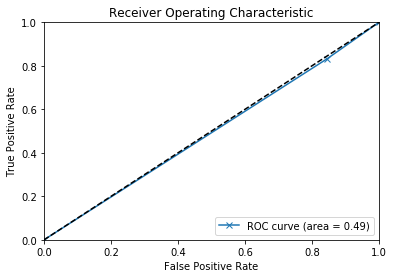

In [50]:
from matplotlib.pyplot import *

clf()
plot(fpr, tpr, '-x', label='ROC curve (area = %0.2f)' % roc_auc)
# Plot the line of no discrimination
plot([0, 1], [0, 1], 'k--')
xlim([0.0, 1.0])
ylim([0.0, 1.0])
xlabel('False Positive Rate')
ylabel('True Positive Rate')
title('Receiver Operating Characteristic')
legend(loc="lower right")
show()

## 2.SVM

In [58]:
from sklearn import svm
model = svm.SVC(gamma=0.001)
#model = svm.SVC(gamma='scale', decision_function_shape='ovo')

In [59]:
model.fit(training_features, training_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [60]:
predicted_labels = model.predict(testing_features)

In [61]:
print (testing_labels )

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]


Perform 5-fold cross validation (cv=5):

In [62]:
acc  = sklearn.model_selection.cross_val_score(model, training_features, training_labels, cv=5)

In [63]:
print (acc)
print (acc.mean())

[0.6 0.6 0.6 0.6 0.6]
0.6


Evaluation

In [64]:
tp = sum((testing_labels == 1) & (predicted_labels == 1))
tn = sum((testing_labels == 0) & (predicted_labels == 0))
fp = sum((testing_labels == 0) & (predicted_labels == 1))
fn = sum((testing_labels == 1) & (predicted_labels == 0))

In [65]:
print (tp, tn, fp, fn)

0 13 0 12


Evaluate the model accuracy on the test data.

In [67]:
model.fit(training_features, training_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [68]:
model.score(testing_features, testing_labels)

0.52

compute the recall score, and verify it is correct:

In [71]:
sklearn.metrics.recall_score(testing_labels, predicted_labels)

0.0

In [72]:
recall = tp/float(tp+fn)
print (recall)

0.0


Compute the precision score, and verify:

In [74]:
sklearn.metrics.precision_score(testing_labels, predicted_labels)

/home/rutherford/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [75]:
precision = tp/float(tp+fp)
print (precision)

nan


/home/rutherford/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


Compute the F-measure, and verify:

In [76]:
sklearn.metrics.f1_score(testing_labels, predicted_labels)

/home/rutherford/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [77]:
fmeasure = 2*recall*precision/float(recall+precision)
print (fmeasure)

nan


## Roc Curve

In [78]:
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, auc
roc_curve?

In [79]:
# We can use roc_curve to produce the false and true positive rates for each example, given the labels and normalised scores. 
# The scores represent the classifier's confidence of each classification.
# Since our classifications do not issue a confidence measure, we make them binary.
#((testing_labels == 1) & (predicted_labels == 1))
scores = (predicted_labels == testing_labels) + 0.0
#scores = (model_output == gt_labels) + 0.0
print (scores)

positive_label = 1 # The label that we call correct.

# We indicate to roc_curve that the value 1 in gt_labels is our positive snare label.
fpr, tpr, thresholds = roc_curve(testing_labels, scores, pos_label=positive_label)
print (fpr)
print (tpr)
print (thresholds)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
[0. 1. 1.]
[0. 0. 1.]
[2. 1. 0.]


In [80]:
# Alternatively the area under curve can be computed directly from the positive rates.
roc_auc = auc(fpr, tpr)
roc_auc

0.0

We can then plot an ROC curve with matplotlib

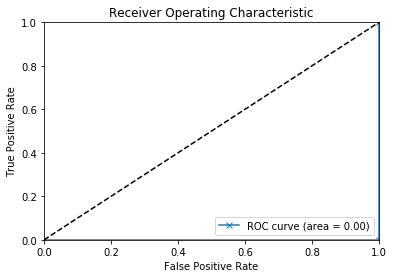

In [81]:
from matplotlib.pyplot import *

clf()
plot(fpr, tpr, '-x', label='ROC curve (area = %0.2f)' % roc_auc)
# Plot the line of no discrimination
plot([0, 1], [0, 1], 'k--')
xlim([0.0, 1.0])
ylim([0.0, 1.0])
xlabel('False Positive Rate')
ylabel('True Positive Rate')
title('Receiver Operating Characteristic')
legend(loc="lower right")
show()

## 3.Linear Regression

In [82]:
model = sklearn.linear_model.LinearRegression()

In [83]:
model.fit(training_features, training_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [84]:
acc  = sklearn.model_selection.cross_val_score(model, training_features, training_labels, cv=5)

In [85]:
print (acc)
print (acc.mean())

[0. 0. 0. 0. 0.]
0.0


## 4.Logistic Regression

In [86]:
model = sklearn.linear_model.LogisticRegression()

In [87]:
model.fit(training_features, training_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [88]:
acc  = sklearn.model_selection.cross_val_score(model, training_features, training_labels, cv=5)

In [89]:
print (acc)
print (acc.mean())

[0.05 0.6  0.   0.6  0.6 ]
0.37


In [90]:
predicted_labels = model.predict(testing_features)

In [91]:
print (testing_labels )

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]


In [92]:
print (predicted_labels)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


Evaluation

In [93]:
tp = sum((testing_labels == 1) & (predicted_labels == 1))
tn = sum((testing_labels == 0) & (predicted_labels == 0))
fp = sum((testing_labels == 0) & (predicted_labels == 1))
fn = sum((testing_labels == 1) & (predicted_labels == 0))

In [94]:
print (tp, tn, fp, fn)

0 13 0 12


Evaluate the model accuracy on the test data.

In [95]:
model.fit(training_features, training_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [96]:
model.score(testing_features, testing_labels)

0.52

compute the recall score, and verify it is correct:

In [97]:
sklearn.metrics.recall_score(testing_labels, predicted_labels)
recall = tp/float(tp+fn)
print (recall)

0.0


Compute the precision score, and verify:

In [98]:
sklearn.metrics.precision_score(testing_labels, predicted_labels)
precision = tp/float(tp+fp)
print (precision)

nan


/home/rutherford/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/rutherford/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


Compute the F-measure, and verify:

In [99]:
sklearn.metrics.f1_score(testing_labels, predicted_labels)
fmeasure = 2*recall*precision/float(recall+precision)
print (fmeasure)

nan


/home/rutherford/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


## Roc Curve

In [100]:
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, auc
roc_curve?

In [101]:
# We can use roc_curve to produce the false and true positive rates for each example, given the labels and normalised scores. 
# The scores represent the classifier's confidence of each classification.
# Since our classifications do not issue a confidence measure, we make them binary.
#((testing_labels == 1) & (predicted_labels == 1))
scores = (predicted_labels == testing_labels) + 0.0
#scores = (model_output == gt_labels) + 0.0
print (scores)

positive_label = 1 # The label that we call correct.

# We indicate to roc_curve that the value 1 in gt_labels is our positive snare label.
fpr, tpr, thresholds = roc_curve(testing_labels, scores, pos_label=positive_label)
print (fpr)
print (tpr)
print (thresholds)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
[0. 1. 1.]
[0. 0. 1.]
[2. 1. 0.]


In [102]:
# Alternatively the area under curve can be computed directly from the positive rates.
roc_auc = auc(fpr, tpr)
roc_auc

0.0

We can then plot an ROC curve with matplotlib

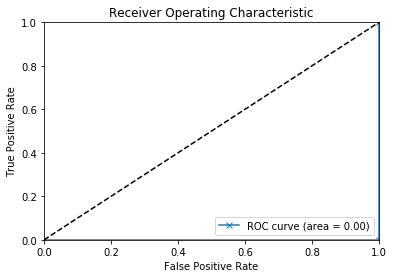

In [103]:
from matplotlib.pyplot import *

clf()
plot(fpr, tpr, '-x', label='ROC curve (area = %0.2f)' % roc_auc)
# Plot the line of no discrimination
plot([0, 1], [0, 1], 'k--')
xlim([0.0, 1.0])
ylim([0.0, 1.0])
xlabel('False Positive Rate')
ylabel('True Positive Rate')
title('Receiver Operating Characteristic')
legend(loc="lower right")
show()

## 5.Naive Bayes

In [283]:
from sklearn.naive_bayes import GaussianNB
model = sklearn.naive_bayes.GaussianNB()

In [284]:
model.fit(training_features, training_labels)

GaussianNB(priors=None)

In [285]:
acc  = sklearn.model_selection.cross_val_score(model, training_features, training_labels, cv=5)

In [286]:
print (acc)
print (acc.mean())

[0.9  0.95 0.95 0.6  0.25]
0.73


EValuation

In [287]:
predicted_labels = model.predict(testing_features)

In [288]:
predicted_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 0., 1., 0.])

In [291]:
tp = sum((testing_labels == 1) & (predicted_labels == 1))
tn = sum((testing_labels == 0) & (predicted_labels == 0))
fp = sum((testing_labels == 0) & (predicted_labels == 1))
fn = sum((testing_labels == 1) & (predicted_labels == 0))

In [292]:
print (tp, tn, fp, fn)

7 10 3 5


Evaluate the model accuracy on the test data.

In [293]:
model.score(testing_features, testing_labels)

0.68

compute the recall score, and verify it is correct:

In [294]:
sklearn.metrics.recall_score(testing_labels, predicted_labels)

0.5833333333333334

In [295]:
recall = tp/float(tp+fn)
print (recall)

0.5833333333333334


Compute the precision score, and verify:

In [296]:
sklearn.metrics.precision_score(testing_labels, predicted_labels)

0.7

In [298]:
precision = tp/float(tp+fp)
print (precision)

0.7


## Roc Curve

Alternatively, often we want to understand the performance of a single classifier over a range of different threshold parameter settings. A "Receiver Operating Characteristics" (ROC) curve plots true positive rate vs. false positive rate for different parameter settings. This depicts the relative trade-offs between true positive (benefits) and false positive (costs) for each parameter value.

Plotting this curve is made easy with scikit.learn's ROC functions. It is however, restricted to binary classifications (i.e. snare vs. non-snare).

In [299]:
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, auc
roc_curve?

In [300]:
# We can use roc_curve to produce the false and true positive rates for each example, given the labels and normalised scores. 
# The scores represent the classifier's confidence of each classification.
# Since our classifications do not issue a confidence measure, we make them binary.
#((testing_labels == 1) & (predicted_labels == 1))
scores = (predicted_labels == testing_labels) + 0.0
#scores = (model_output == gt_labels) + 0.0
print (scores)

positive_label = 1 # The label that we call correct.

# We indicate to roc_curve that the value 1 in gt_labels is our positive snare label.
fpr, tpr, thresholds = roc_curve(testing_labels, scores, pos_label=positive_label)
print (fpr)
print (tpr)
print (thresholds)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1.
 0.]
[0.         0.76923077 1.        ]
[0.         0.58333333 1.        ]
[2. 1. 0.]


In [301]:
# Alternatively the area under curve can be computed directly from the positive rates.
roc_auc = auc(fpr, tpr)
roc_auc

0.40705128205128205

We can then plot an ROC curve with matplotlib

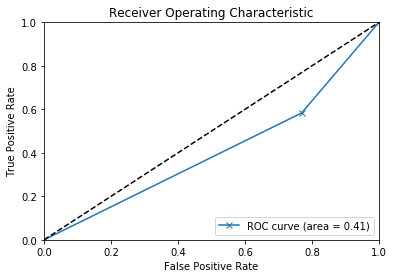

In [302]:
from matplotlib.pyplot import *

clf()
plot(fpr, tpr, '-x', label='ROC curve (area = %0.2f)' % roc_auc)
# Plot the line of no discrimination
plot([0, 1], [0, 1], 'k--')
xlim([0.0, 1.0])
ylim([0.0, 1.0])
xlabel('False Positive Rate')
ylabel('True Positive Rate')
title('Receiver Operating Characteristic')
legend(loc="lower right")
show()

## 6.Random Forest

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

/home/rutherford/.local/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [105]:
training_features, training_labels = make_classification(n_samples=100, n_features=4,
                                                         n_informative=2, n_redundant=0,
                                                         random_state=0, shuffle=False)

In [106]:
model = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)

In [107]:
model.fit(training_features, training_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [108]:
acc  = sklearn.model_selection.cross_val_score(model, training_features, training_labels, cv=5)

In [109]:
print (acc)
print (acc.mean())

[0.9047619  0.85       0.9        0.95       0.89473684]
0.8998997493734334


Evaluation

Predicted labels

In [111]:
testing_features, testing_labels = make_classification(n_samples=100, n_features=4,
                                                         n_informative=2, n_redundant=0,
                                                         random_state=0, shuffle=False)

In [113]:
predicted_labels = model.predict(testing_features)

In [114]:
print (predicted_labels)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]


Evaluation

In [115]:
tp = sum((testing_labels == 1) & (predicted_labels == 1))
tn = sum((testing_labels == 0) & (predicted_labels == 0))
fp = sum((testing_labels == 0) & (predicted_labels == 1))
fn = sum((testing_labels == 1) & (predicted_labels == 0))

In [116]:
print (tp, tn, fp, fn)

48 45 4 3


Evaluate the model accuracy on the test data.

In [117]:
model.fit(training_features, training_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [118]:
model.score(testing_features, testing_labels)

0.93

compute the recall score, and verify it is correct:

In [119]:
sklearn.metrics.recall_score(testing_labels, predicted_labels)

0.9411764705882353

In [120]:
recall = tp/float(tp+fn)
print (recall)

0.9411764705882353


Compute the precision score, and verify:

In [121]:
sklearn.metrics.precision_score(testing_labels, predicted_labels)

0.9230769230769231

In [123]:
precision = tp/float(tp+fp)
print (precision)

0.9230769230769231


Compute the F-measure, and verify:

In [124]:
sklearn.metrics.f1_score(testing_labels, predicted_labels)

0.9320388349514563

In [126]:
fmeasure = 2*recall*precision/float(recall+precision)
print (fmeasure)

0.9320388349514563


## Roc Curve

In [127]:
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, auc
roc_curve?

In [128]:
# We can use roc_curve to produce the false and true positive rates for each example, given the labels and normalised scores. 
# The scores represent the classifier's confidence of each classification.
# Since our classifications do not issue a confidence measure, we make them binary.
#((testing_labels == 1) & (predicted_labels == 1))
scores = (predicted_labels == testing_labels) + 0.0
#scores = (model_output == gt_labels) + 0.0
print (scores)

positive_label = 1 # The label that we call correct.

# We indicate to roc_curve that the value 1 in gt_labels is our positive snare label.
fpr, tpr, thresholds = roc_curve(testing_labels, scores, pos_label=positive_label)
print (fpr)
print (tpr)
print (thresholds)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1.]
[0.         0.91836735 1.        ]
[0.         0.94117647 1.        ]
[2. 1. 0.]


In [129]:
# Alternatively the area under curve can be computed directly from the positive rates.
roc_auc = auc(fpr, tpr)
roc_auc

0.5114045618247298

We can then plot an ROC curve with matplotlib

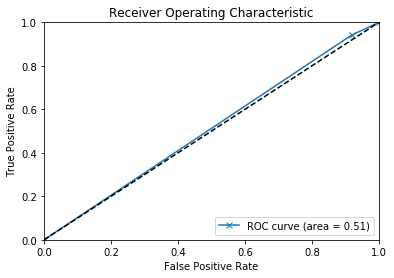

In [130]:
from matplotlib.pyplot import *

clf()
plot(fpr, tpr, '-x', label='ROC curve (area = %0.2f)' % roc_auc)
# Plot the line of no discrimination
plot([0, 1], [0, 1], 'k--')
xlim([0.0, 1.0])
ylim([0.0, 1.0])
xlabel('False Positive Rate')
ylabel('True Positive Rate')
title('Receiver Operating Characteristic')
legend(loc="lower right")
show()

## 7.Gausian Mixture Models

In [81]:
from sklearn.mixture import GaussianMixture
model = sklearn.mixture.GaussianMixture()

In [82]:
model.fit(training_features, training_labels)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=1, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [83]:
acc  = sklearn.model_selection.cross_val_score(model, training_features, training_labels, cv=5)

In [84]:
print (acc)
print (acc.mean())

[1.42144621 2.72547468 5.18623308 5.12753605 5.15458104]
3.9230542128160524


In [86]:
from math import exp
#prob = exp(acc)

In [87]:
predicted_labels = model.predict(testing_features)

In [88]:
print (predicted_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [89]:
model.fit_predict(testing_features)

AttributeError: 'GaussianMixture' object has no attribute 'fit_predict'

In [90]:
gmm.score(testing_features)

4.727781466917042

In [91]:
allmodels = []
for feat in training_features:
    gmm = GaussianMixture() #default weights and means
    gmm.fit(training_features)
    allmodels.append(gmm)

i = 1
for gmm in allmodels:
    print ('Model ',i)
    scores = gmm.score(testing_features)
    print (scores)
    i = i+1

Model  1
4.727781466917042
Model  2
4.727781466917042
Model  3
4.727781466917042
Model  4
4.727781466917042
Model  5
4.727781466917042
Model  6
4.727781466917042
Model  7
4.727781466917042
Model  8
4.727781466917042
Model  9
4.727781466917042
Model  10
4.727781466917042
Model  11
4.727781466917042
Model  12
4.727781466917042
Model  13
4.727781466917042
Model  14
4.727781466917042
Model  15
4.727781466917042
Model  16
4.727781466917042
Model  17
4.727781466917042
Model  18
4.727781466917042
Model  19
4.727781466917042
Model  20
4.727781466917042
Model  21
4.727781466917042
Model  22
4.727781466917042
Model  23
4.727781466917042
Model  24
4.727781466917042
Model  25
4.727781466917042
Model  26
4.727781466917042
Model  27
4.727781466917042
Model  28
4.727781466917042
Model  29
4.727781466917042
Model  30
4.727781466917042
Model  31
4.727781466917042
Model  32
4.727781466917042
Model  33
4.727781466917042
Model  34
4.727781466917042
Model  35
4.727781466917042
Model  36
4.727781466917042
M

Evaluation

In [92]:
tp = sum((testing_labels == 1) & (predicted_labels == 1))
tn = sum((testing_labels == 0) & (predicted_labels == 0))
fp = sum((testing_labels == 0) & (predicted_labels == 1))
fn = sum((testing_labels == 1) & (predicted_labels == 0))

In [93]:
print (tp, tn, fp, fn)

0 13 0 12


Evaluate the model accuracy on the test data.

In [94]:
model.fit(training_features, training_labels)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=1, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [95]:
model.score(testing_features, testing_labels)

4.727781466917042

compute the recall score, and verify it is correct:

In [96]:
sklearn.metrics.recall_score(testing_labels, predicted_labels)

0.0

In [97]:
recall = tp/float(tp+fn)
print (recall)

0.0


Compute the precision score, and verify:

In [98]:
sklearn.metrics.precision_score(testing_labels, predicted_labels)

/home/rutherford/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [99]:
precision = tp/float(tp+fp)
print (precision)

nan


/home/rutherford/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


Compute the F-measure, and verify:

In [100]:
sklearn.metrics.f1_score(testing_labels, predicted_labels)

/home/rutherford/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [101]:
fmeasure = 2*recall*precision/float(recall+precision)
print (fmeasure)

nan


## Roc Curve

In [102]:
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, auc
roc_curve?

In [103]:
# We can use roc_curve to produce the false and true positive rates for each example, given the labels and normalised scores. 
# The scores represent the classifier's confidence of each classification.
# Since our classifications do not issue a confidence measure, we make them binary.
#((testing_labels == 1) & (predicted_labels == 1))
scores = (predicted_labels == testing_labels) + 0.0
#scores = (model_output == gt_labels) + 0.0
print (scores)

positive_label = 1 # The label that we call correct.

# We indicate to roc_curve that the value 1 in gt_labels is our positive snare label.
fpr, tpr, thresholds = roc_curve(testing_labels, scores, pos_label=positive_label)
print (fpr)
print (tpr)
print (thresholds)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
[0. 1. 1.]
[0. 0. 1.]
[2. 1. 0.]


In [104]:
# Alternatively the area under curve can be computed directly from the positive rates.
roc_auc = auc(fpr, tpr)
roc_auc

0.0

We can then plot an ROC curve with matplotlib

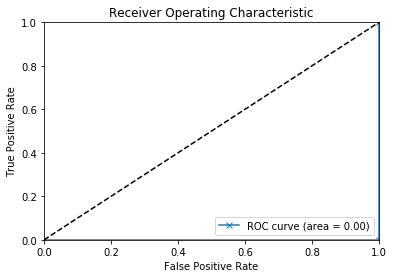

In [105]:
from matplotlib.pyplot import *

clf()
plot(fpr, tpr, '-x', label='ROC curve (area = %0.2f)' % roc_auc)
# Plot the line of no discrimination
plot([0, 1], [0, 1], 'k--')
xlim([0.0, 1.0])
ylim([0.0, 1.0])
xlabel('False Positive Rate')
ylabel('True Positive Rate')
title('Receiver Operating Characteristic')
legend(loc="lower right")
show()

## Bayesian Gausian Mixture Model

In [106]:
model = sklearn.mixture.BayesianGaussianMixture()

In [107]:
model.fit(training_features, training_labels)

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
            degrees_of_freedom_prior=None, init_params='kmeans',
            max_iter=100, mean_precision_prior=None, mean_prior=None,
            n_components=1, n_init=1, random_state=None, reg_covar=1e-06,
            tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
            weight_concentration_prior=None,
            weight_concentration_prior_type='dirichlet_process')

In [108]:
acc  = sklearn.model_selection.cross_val_score(model, training_features, training_labels, cv=5)

In [109]:
print (acc)
acc_mean = acc.mean()
print(acc_mean)
#print ( acc.mean())

[1.34444356 2.66579597 5.16113117 5.10154454 5.12900012]
3.8803830737220606


In [110]:
pb = (np.exp(acc_mean)/np.exp(acc)) * 100
print(pb)

[1262.82896844  336.89027563   27.78293798   29.48874662   28.69012932]


In [111]:
predicted_labels = model.predict(testing_features)

In [112]:
print(predicted_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Evaluation

In [113]:
tp = sum((testing_labels == 1) & (predicted_labels == 1))
tn = sum((testing_labels == 0) & (predicted_labels == 0))
fp = sum((testing_labels == 0) & (predicted_labels == 1))
fn = sum((testing_labels == 1) & (predicted_labels == 0))

In [114]:
print (tp, tn, fp, fn)

0 13 0 12


Evaluate the model accuracy on the test data.

In [115]:
model.fit(training_features, training_labels)

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
            degrees_of_freedom_prior=None, init_params='kmeans',
            max_iter=100, mean_precision_prior=None, mean_prior=None,
            n_components=1, n_init=1, random_state=None, reg_covar=1e-06,
            tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
            weight_concentration_prior=None,
            weight_concentration_prior_type='dirichlet_process')

In [116]:
model.score(testing_features, testing_labels)

4.702131595235334

Compute the recall score, and verify it is correct:

In [56]:
sklearn.metrics.recall_score(testing_labels, predicted_labels)

0.0

Compute the recall score, and verify it is correct:

In [57]:
sklearn.metrics.recall_score(testing_labels, predicted_labels)

0.0

In [58]:
recall = tp/float(tp+fn)
print (recall)

0.0


Compute the precision score, and verify:

In [59]:
sklearn.metrics.precision_score(testing_labels, predicted_labels)

/home/rutherford/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [60]:
precision = tp/float(tp+fp)
print (precision)

nan


/home/rutherford/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


Compute the F-measure, and verify:

In [61]:
sklearn.metrics.f1_score(testing_labels, predicted_labels)

/home/rutherford/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [62]:
fmeasure = 2*recall*precision/float(recall+precision)
print (fmeasure)

nan


## Roc Curve

In [63]:
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, auc
roc_curve?

In [64]:
# We can use roc_curve to produce the false and true positive rates for each example, given the labels and normalised scores. 
# The scores represent the classifier's confidence of each classification.
# Since our classifications do not issue a confidence measure, we make them binary.
#((testing_labels == 1) & (predicted_labels == 1))
scores = (predicted_labels == testing_labels) + 0.0
#scores = (model_output == gt_labels) + 0.0
print (scores)

positive_label = 1 # The label that we call correct.

# We indicate to roc_curve that the value 1 in gt_labels is our positive snare label.
fpr, tpr, thresholds = roc_curve(testing_labels, scores, pos_label=positive_label)
print (fpr)
print (tpr)
print (thresholds)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
[0. 1. 1.]
[0. 0. 1.]
[2. 1. 0.]


In [65]:
# Alternatively the area under curve can be computed directly from the positive rates.
roc_auc = auc(fpr, tpr)
roc_auc

0.0

We can then plot an ROC curve with matplotlib

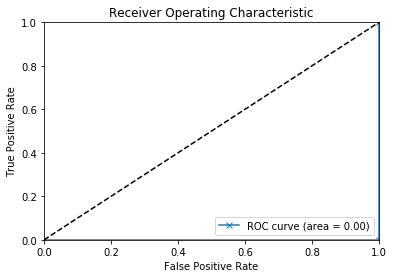

In [66]:
from matplotlib.pyplot import *

clf()
plot(fpr, tpr, '-x', label='ROC curve (area = %0.2f)' % roc_auc)
# Plot the line of no discrimination
plot([0, 1], [0, 1], 'k--')
xlim([0.0, 1.0])
ylim([0.0, 1.0])
xlabel('False Positive Rate')
ylabel('True Positive Rate')
title('Receiver Operating Characteristic')
legend(loc="lower right")
show()